Data loading


In [1]:
import pandas as pd

# Load dataset
print("Loading dataset...")
data = pd.read_csv(r"L:\Guvi\Power\household_power_consumption.txt", sep=';', low_memory=False, na_values=['?'])

# Preview the first few rows
print(data.head())


Loading dataset...
         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  


Data Set Structure

In [2]:
# Print dataset information
print("Dataset Information:")
print(data.info())

# Summary statistics
print("Dataset Statistics:")
print(data.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB
None
Dataset Statistics:
       Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.3899

Data Cleaning

In [3]:
# Fill missing values (forward fill method)
print("Cleaning dataset...")
data.fillna(method='ffill', inplace=True)

# Convert numeric columns to appropriate data types
data = data.apply(pd.to_numeric, errors='coerce')

# Remove rows with remaining NaN values
data.dropna(inplace=True)

print("Data cleaning complete!")


Cleaning dataset...


C:\Users\CARE\AppData\Local\Temp\ipykernel_1996\668257979.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Data cleaning complete!


Data Analysis

Analyzing data...


c:\Users\CARE\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\CARE\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


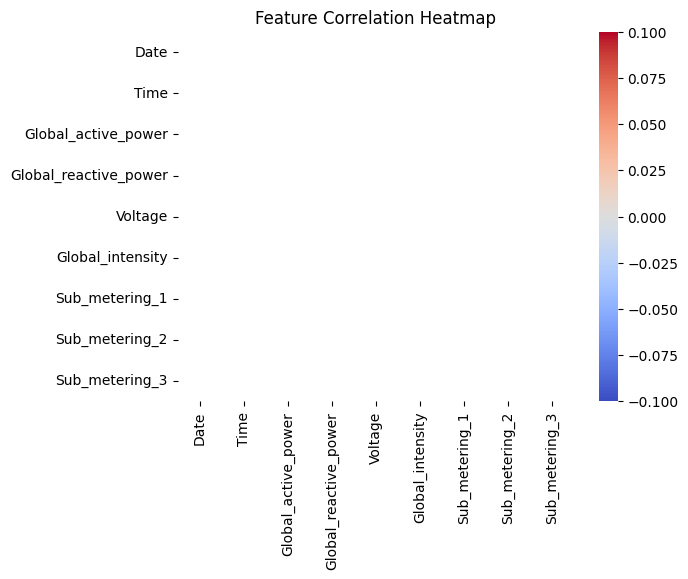

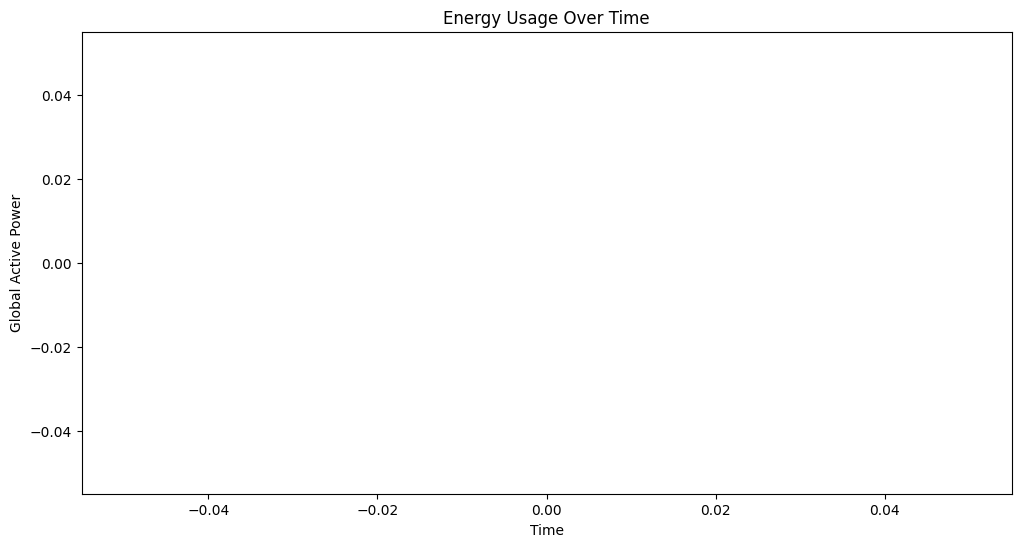

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot correlation heatmap
print("Analyzing data...")
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Plot energy usage trends
data['Global_active_power'].plot(figsize=(12, 6))
plt.title("Energy Usage Over Time")
plt.xlabel("Time")
plt.ylabel("Global Active Power")
plt.show()


In [ ]:
print("Feature engineering...")
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')
data['hour'] = data['Datetime'].dt.hour
data['day'] = data['Datetime'].dt.day
data['month'] = data['Datetime'].dt.month
data['year'] = data['Datetime'].dt.year
data.drop(['Date', 'Time'], axis=1, inplace=True)

# Example: Rolling average
data['rolling_avg'] = data['Global_active_power'].rolling(window=24).mean()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Split data into features and target
X = data.drop(['Global_active_power'], axis=1)  # Features
y = data['Global_active_power']                # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
print("Training models...")
lr_model = LinearRegression()
rf_model = RandomForestRegressor()
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

print("Models trained successfully!")


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate predictions
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"RMSE: {rmse}, MAE: {mae}, R-Squared: {r2}")

print("Linear Regression Performance:")
evaluate_model(y_test, lr_predictions)

print("Random Forest Performance:")
evaluate_model(y_test, rf_predictions)


In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(rf_predictions, label='Predicted', color='orange')
plt.title("Actual vs Predicted Energy Usage")
plt.legend()
plt.show()
